In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

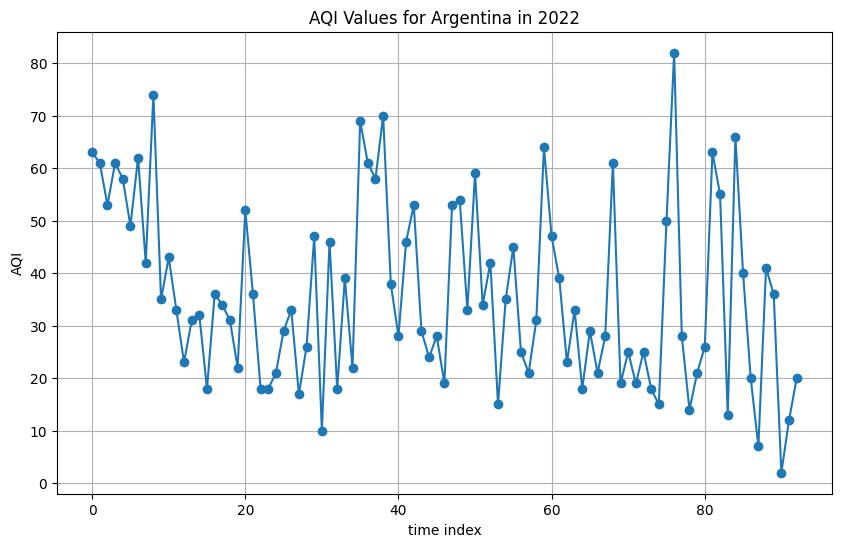

In [9]:
df = pd.read_csv("AQI-2022.csv")
argentina_data = df[df.iloc[:, 1] == "Argentina"]
x_values = np.arange(len(y_values))
y_values = argentina_data.iloc[:, 3]
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.title("AQI Values for Argentina in 2022")
plt.xlabel("time index")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_values)

# Display all the results
print("ADF Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")
print(f"Lags Used: {result[2]}")
print(f"Number of Observations Used: {result[3]}")
print(f"Critical Values:")
for key, value in result[4].items():
    print(f"  {key}: {value}")

ADF Test Results:
ADF Statistic: -7.296219740782088
P-value: 1.375762285336978e-10
Lags Used: 0
Number of Observations Used: 92
Critical Values:
  1%: -3.503514579651927
  5%: -2.893507960466837
  10%: -2.583823615311909


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              AQI Value   No. Observations:                   93
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -393.891
Date:                Wed, 15 Nov 2023   AIC                            795.782
Time:                        04:03:49   BIC                            805.913
Sample:                             0   HQIC                           799.873
                                 - 93                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0423      3.256     11.068      0.000      29.660      42.425
ar.L1          0.7127      0.214      3.325      0.001       0.293       1.133
ma.L1         -0.4950      0.256     -1.934      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: ignored

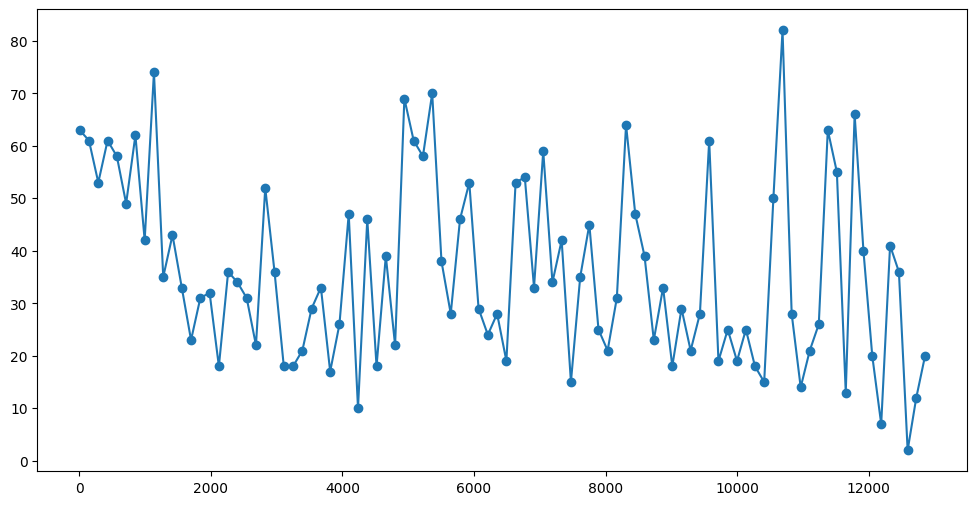

In [14]:
# Data is apparently stationary...

from statsmodels.tsa.arima.model import ARIMA

p, d, q = 1, 0, 1  # Replace with appropriate values

# Create and fit the ARIMA model
arima_model = ARIMA(y_values, order=(p, d, q))
arima_result = arima_model.fit()

print(arima_result.summary())

n_forecast = 120  # Replace with the desired number of periods to forecast
forecast = arima_result.forecast(steps=n_forecast)

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(y_values, label="Original Data", marker='o', linestyle='-')

# Plot the forecasted values
plt.plot(range(len(y_values)+n_forecast, len(y_values) + n_forecast), forecast, label="Forecast", marker='o', linestyle='--')

plt.title("ARIMA Forecast for AQI Values")
plt.xlabel("Time")
plt.ylabel("4th Column Values")
plt.legend()
plt.grid(True)
plt.show()